In [1]:
%pip install numpy
%pip install pandas
%pip install matplotlib
%pip install scikit-learn
%pip install seaborn


[notice] A new release of pip available: 22.1.2 -> 24.0
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip available: 22.1.2 -> 24.0
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip available: 22.1.2 -> 24.0
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip available: 22.1.2 -> 24.0
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip available: 22.1.2 -> 24.0
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
# import sys
# sys.path.insert(0, './')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, ElasticNet
import csv
import seaborn as sns

In [9]:
path1 = f"../data/round_4/prices_round_4_day_1.csv"
path2 = f"../data/round_4/prices_round_4_day_2.csv"
path3 = f"../data/round_4/prices_round_4_day_3.csv"
results_path = f"../data/round_4/algo_data.csv"

In [5]:
# data1 = pd.read_csv(path1, delimiter=";", parse_dates=True)
# data2 = pd.read_csv(path2, delimiter=";", parse_dates=True)
# data3 = pd.read_csv(path3, delimiter=";", parse_dates=True)
# algo_data = pd.read_csv(results_path, delimiter=";", parse_dates=True)

In [10]:
prices = pd.read_csv(results_path, index_col="timestamp", delimiter=";")
prices

,day,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
timestamp,,,,,,,,,,,,,,,,
200,3,STARFRUIT,5002,1,5001.0,75.0,NaN,NaN,5008,75,NaN,NaN,NaN,NaN,5005.0,0.000000
200,3,COCONUT,9990,235,9989.0,259.0,NaN,NaN,9991,206,9992.0,294.0,NaN,NaN,9990.5,0.000000
200,3,STRAWBERRIES,3984,663,NaN,NaN,NaN,NaN,3986,663,NaN,NaN,NaN,NaN,3985.0,0.000000
200,3,ROSES,14420,6,14417.0,12.0,14415.0,53.0,14422,71,NaN,NaN,NaN,NaN,14421.0,0.000000
200,3,COCONUT_COUPON,620,80,619.0,38.0,NaN,NaN,621,118,NaN,NaN,NaN,NaN,620.5,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99900,3,STARFRUIT,4977,27,NaN,NaN,NaN,NaN,4983,1,4984.0,26.0,NaN,NaN,4980.0,1969.796875
99900,3,GIFT_BASKET,69440,1,69439.0,12.0,69438.0,27.0,69451,1,69452.0,12.0,69453.0,27.0,69445.5,1369.500000
99900,3,COCONUT_COUPON,597,40,NaN,NaN,NaN,NaN,598,40,NaN,NaN,NaN,NaN,597.5,0.000000


In [14]:
data_AMETHYSTS = prices.loc[prices['product']=='AMETHYSTS'][['mid_price']].rename(columns={'mid_price': 'AMETHYSTS'})
data_STARFRUIT = prices.loc[prices['product']=='STARFRUIT'][['mid_price']].rename(columns={'mid_price': 'STARFRUIT'})
data_COCONUTS = prices.loc[prices['product']=='COCONUT'][['mid_price']].rename(columns={'mid_price': 'COCONUT'})
data_COCO_COUPONS = prices.loc[prices['product']=='COCONUT_COUPON'][['mid_price']].rename(columns={'mid_price': 'COCO_COUPON'})
data_CHOCOLATE = prices.loc[prices['product']=='CHOCOLATE'][['mid_price']].rename(columns={'mid_price': 'CHOCOLATE'})
data_STRAWBERRIES = prices.loc[prices['product']=='STRAWBERRIES'][['mid_price']].rename(columns={'mid_price': 'STRAWBERRIES'})
data_GIFT_BASKETS = prices.loc[prices['product']=='GIFT_BASKET'][['mid_price']].rename(columns={'mid_price': 'GIFT_BASKET'})
data_ROSES = prices.loc[prices['product']=='ROSES'][['mid_price']].rename(columns={'mid_price': 'ROSES'})
prices = pd.concat([data_AMETHYSTS, data_STARFRUIT, data_COCONUTS, data_COCO_COUPONS, data_CHOCOLATE, data_STRAWBERRIES, data_GIFT_BASKETS, data_ROSES], axis=1)
prices.columns = pd.MultiIndex.from_product([['mid_price'], prices.columns.tolist()])
prices

KeyError: 'product'

array([<Axes: xlabel='timestamp'>, <Axes: xlabel='timestamp'>,
       <Axes: xlabel='timestamp'>, <Axes: xlabel='timestamp'>,
       <Axes: xlabel='timestamp'>, <Axes: xlabel='timestamp'>],
      dtype=object)

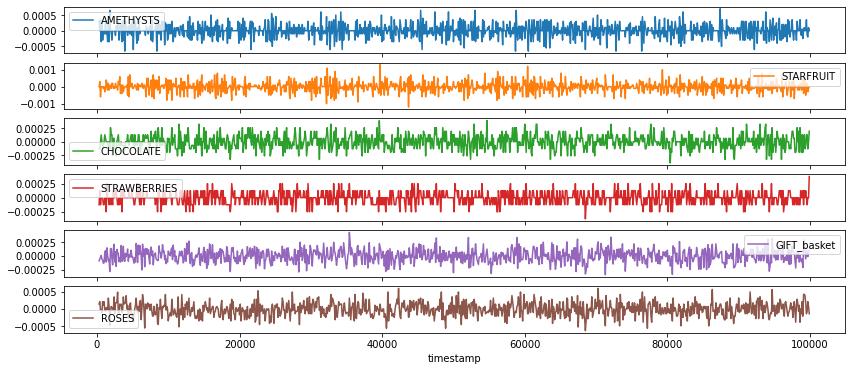

In [12]:
returns = np.log(prices['mid_price']/ prices['mid_price'].shift(1))
returns.dropna(inplace=True)
returns.plot(subplots=True, figsize=(14,6))

array([[<Axes: xlabel='AMETHYSTS', ylabel='AMETHYSTS'>,
        <Axes: xlabel='STARFRUIT', ylabel='AMETHYSTS'>,
        <Axes: xlabel='CHOCOLATE', ylabel='AMETHYSTS'>,
        <Axes: xlabel='STRAWBERRIES', ylabel='AMETHYSTS'>,
        <Axes: xlabel='GIFT_basket', ylabel='AMETHYSTS'>,
        <Axes: xlabel='ROSES', ylabel='AMETHYSTS'>],
       [<Axes: xlabel='AMETHYSTS', ylabel='STARFRUIT'>,
        <Axes: xlabel='STARFRUIT', ylabel='STARFRUIT'>,
        <Axes: xlabel='CHOCOLATE', ylabel='STARFRUIT'>,
        <Axes: xlabel='STRAWBERRIES', ylabel='STARFRUIT'>,
        <Axes: xlabel='GIFT_basket', ylabel='STARFRUIT'>,
        <Axes: xlabel='ROSES', ylabel='STARFRUIT'>],
       [<Axes: xlabel='AMETHYSTS', ylabel='CHOCOLATE'>,
        <Axes: xlabel='STARFRUIT', ylabel='CHOCOLATE'>,
        <Axes: xlabel='CHOCOLATE', ylabel='CHOCOLATE'>,
        <Axes: xlabel='STRAWBERRIES', ylabel='CHOCOLATE'>,
        <Axes: xlabel='GIFT_basket', ylabel='CHOCOLATE'>,
        <Axes: xlabel='ROSES', ylabel='

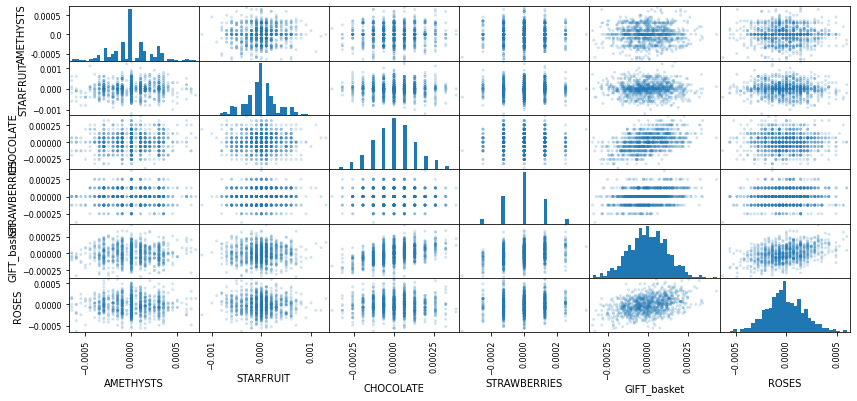

In [13]:
pd.plotting.scatter_matrix(returns, alpha=0.2, diagonal='hist', hist_kwds={'bins': 35}, figsize=(14,6))